In [1]:
from torch.utils.data import DataLoader
from utils.utils import show_batch
from datasets import seals

./data/seals/ROJ226\image1866.png
./data/seals/ROM238\image2061.jpeg
./data/seals/ROM231\image1929.png
./data/seals/ROS879\image5815.png
./data/seals/ROF116\image1221.png
./data/seals/ROS796\image4916.png
./data/seals/ROF9\image180.jpeg
./data/seals/ROS796\image4907.png
./data/seals/ROF6\image70.jpeg
./data/seals/ROS849\image5456.png
./data/seals/ROF10\image265.jpeg
./data/seals/ROF6\image120.png
./data/seals/ROM231\image1956.png
./data/seals/ROF77\image645.png
./data/seals/ROM104\image1017.png
./data/seals/ROM338\image2572.png
./data/seals/ROM102\image824.jpeg
./data/seals/ROF63\image577.png
./data/seals/ROS847\image5409.png
./data/seals/ROS849\image5471.png
./data/seals/ROM238\image2078.png
./data/seals/PJF37\image302.png
./data/seals/ROF606\image3612.png
./data/seals/ROF606\image3575.png
./data/seals/ROM271\image2325.png
./data/seals/ROM709\image4235.png
./data/seals/ROF166\image1645.png
./data/seals/ROS849\image5459.png
./data/seals/ROM283\image2370.png
./data/seals/ROM104\image998

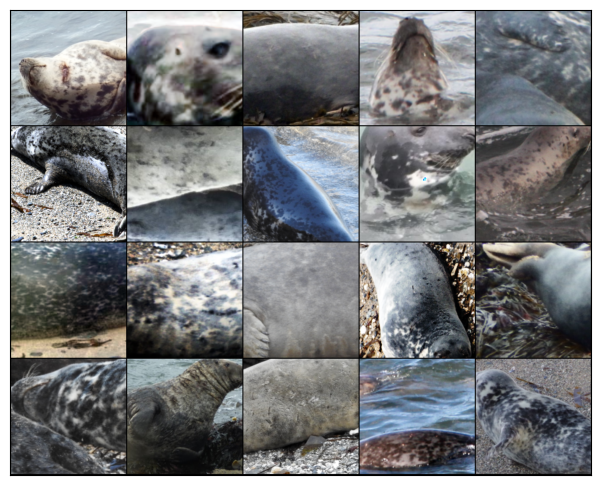

In [5]:
dataset = seals.get_datasets(224, 0, download=False)
train_dl = DataLoader(dataset['train'], batch_size=64, shuffle=True)
show_batch(train_dl)